In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.2
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_0.2_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_0.2_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.1877

Best Fitness:	634.1734
Solution:	600.0000
Diff:		34.1734

[0:08:57][----------] 1.96% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	636.3110

Best Fitness:	629.4645
Solution:	600.0000
Diff:		29.4645

[0:16:32][----------] 3.92% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	640.7441

Best Fitness:	631.4713
Solution:	600.0000
Diff:		31.4713

[0:23:52][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.5525

Best Fitness:	636.7523
Solution:	600.0000
Diff:		36.7523

[0:31:23][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	643.0440

Best Fitness:	637.1235
Solution:	600.0000
Diff:		37.1235

[0:38:29][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	630.7254

Best Fitness:	624.5493
Solution:	600.0000
Diff:		24.5493

[0:45:32][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.2796

Best Fitness:	634.6042
Solution:	600.0000
Diff:		34.6042

[0:52:29][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.4643

Best Fitness:	633.9941
Solution:	600.0000
Diff:		33.9941

[0:59:47][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	638.6259

Best Fitness:	631.7871
Solution:	600.0000
Diff:		31.7871

[1:06:47][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.2953

Best Fitness:	634.5995
Solution:	600.0000
Diff:		34.5995

[1:14:12][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.1602

Best Fitness:	636.1137
Solution:	600.0000
Diff:		36.1137

[1:21:21][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.5537

Best Fitness:	633.1196
Solution:	600.0000
Diff:		33.1196

[1:28:30][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.8937

Best Fitness:	635.4061
Solution:	600.0000
Diff:		35.4061

[1:35:57][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	643.5588

Best Fitness:	638.2919
Solution:	600.0000
Diff:		38.2919

[1:42:39][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.7494

Best Fitness:	635.0269
Solution:	600.0000
Diff:		35.0269

[1:49:52][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.4014

Best Fitness:	635.9011
Solution:	600.0000
Diff:		35.9011

[1:57:01][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	637.2275

Best Fitness:	629.6400
Solution:	600.0000
Diff:		29.6400

[2:03:56][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	632.7383

Best Fitness:	625.6072
Solution:	600.0000
Diff:		25.6072

[2:11:18][####------] 35.29% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.5095

Best Fitness:	635.0898
Solution:	600.0000
Diff:		35.0898

[2:18:11][####------] 37.25% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	640.8676

Best Fitness:	633.1204
Solution:	600.0000
Diff:		33.1204

[2:25:21][####------] 39.22% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	640.2611

Best Fitness:	633.0507
Solution:	600.0000
Diff:		33.0507

[2:32:37][####------] 41.18% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	643.9950

Best Fitness:	637.7448
Solution:	600.0000
Diff:		37.7448

[2:39:41][####------] 43.14% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.0902

Best Fitness:	633.2856
Solution:	600.0000
Diff:		33.2856

[2:46:36][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.5367

Best Fitness:	637.4429
Solution:	600.0000
Diff:		37.4429

[2:52:48][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	640.6556

Best Fitness:	632.6824
Solution:	600.0000
Diff:		32.6824

[2:59:08][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	643.4714

Best Fitness:	637.9043
Solution:	600.0000
Diff:		37.9043

[3:05:33][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.4625

Best Fitness:	634.0234
Solution:	600.0000
Diff:		34.0234

[3:11:41][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	637.2741

Best Fitness:	628.5024
Solution:	600.0000
Diff:		28.5024

[3:18:07][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.0906

Best Fitness:	636.7962
Solution:	600.0000
Diff:		36.7962

[3:24:29][######----] 56.86% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	640.8852

Best Fitness:	633.5169
Solution:	600.0000
Diff:		33.5169

[3:30:39][######----] 58.82% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.5519

Best Fitness:	637.6262
Solution:	600.0000
Diff:		37.6262

[3:37:03][######----] 60.78% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.0031

Best Fitness:	634.0125
Solution:	600.0000
Diff:		34.0125

[3:43:32][######----] 62.75% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	643.4731

Best Fitness:	633.9452
Solution:	600.0000
Diff:		33.9452

[3:49:47][######----] 64.71% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.2141

Best Fitness:	635.4367
Solution:	600.0000
Diff:		35.4367

[3:56:02][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.6344

Best Fitness:	634.5509
Solution:	600.0000
Diff:		34.5509

[4:01:57][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.6355

Best Fitness:	634.6643
Solution:	600.0000
Diff:		34.6643

[4:08:17][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	640.3887

Best Fitness:	632.6268
Solution:	600.0000
Diff:		32.6268

[4:14:16][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	639.2370

Best Fitness:	631.9539
Solution:	600.0000
Diff:		31.9539

[4:20:25][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	640.7984

Best Fitness:	634.5382
Solution:	600.0000
Diff:		34.5382

[4:26:36][########--] 76.47% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.9841

Best Fitness:	636.9921
Solution:	600.0000
Diff:		36.9921

[4:32:43][########--] 78.43% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	640.1900

Best Fitness:	632.9939
Solution:	600.0000
Diff:		32.9939

[4:39:05][########--] 80.39% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.2676

Best Fitness:	633.9161
Solution:	600.0000
Diff:		33.9161

[4:45:22][########--] 82.35% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	636.6432

Best Fitness:	626.5600
Solution:	600.0000
Diff:		26.5600

[4:51:33][########--] 84.31% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.0929

Best Fitness:	635.7044
Solution:	600.0000
Diff:		35.7044

[4:57:58][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	644.1446

Best Fitness:	637.4490
Solution:	600.0000
Diff:		37.4490

[5:04:11][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.5908

Best Fitness:	636.4061
Solution:	600.0000
Diff:		36.4061

[5:10:21][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	642.4757

Best Fitness:	636.0305
Solution:	600.0000
Diff:		36.0305

[5:16:38][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	640.0017

Best Fitness:	633.0884
Solution:	600.0000
Diff:		33.0884

[5:22:52][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	641.0464

Best Fitness:	633.4701
Solution:	600.0000
Diff:		33.4701

[5:29:09][##########] 96.08% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	643.3742

Best Fitness:	636.2153
Solution:	600.0000
Diff:		36.2153

[5:35:36][##########] 98.04% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	643.0314

Best Fitness:	637.1024
Solution:	600.0000
Diff:		37.1024

[5:42:04][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:42:04

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
193,45.480546,43.435046,42.981902,42.813614,40.540633,43.383976,44.048135,44.187855,43.217765,44.63381,...,39.819217,43.453046,44.420285,42.13419,43.72509,41.824863,41.775653,42.815817,45.072048,50
194,45.480546,43.435046,42.981902,42.813614,40.540633,43.383976,44.048135,43.328867,43.217765,44.63381,...,39.819217,43.453046,44.420285,42.13419,43.72509,41.824863,41.775653,42.815817,45.072048,50
195,45.480546,43.435046,42.981902,42.813614,40.540633,43.383976,44.048135,43.328867,43.217765,44.63381,...,39.819217,43.453046,44.420285,42.13419,43.72509,41.824863,41.775653,42.815817,45.072048,50
196,45.480546,43.435046,42.981902,42.813614,40.540633,43.383976,44.048135,43.328867,43.217765,44.63381,...,39.819217,43.453046,44.420285,42.13419,43.72509,41.824863,41.775653,42.815817,45.072048,50
197,45.480546,43.435046,42.981902,42.813614,40.540633,43.383976,44.048135,43.328867,43.217765,44.63381,...,39.819217,43.453046,44.420285,42.13419,43.72509,41.824863,41.775653,42.815817,45.072048,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 34.17343531689448

Best error for run 1: 29.464535050095606

Best error for run 2: 31.471252482185605

Best error for run 3: 36.752307698065465

Best error for run 4: 37.123545679417816

Best error for run 5: 24.549319168070838

Best error for run 6: 34.60424883458609

Best error for run 7: 33.99407524108824

Best error for run 8: 31.78705804476749

Best error for run 9: 34.599544291903385

Best error for run 10: 36.11373419097572

Best error for run 11: 33.11956487979296

Best error for run 12: 35.4060583138571

Best error for run 13: 38.29187916069293

Best error for run 14: 35.026885124536875

Best error for run 15: 35.90105561440919

Best error for run 16: 29.640032926057643

Best error for run 17: 25.607223555569362

Best error for run 18: 35.089787237231235

Best error for run 19: 33.120361461271614

Best error for run 20: 33.05073700707476

Best error for run 21: 37.74482519332787

Best error for run 22: 33.28558735898184

Best error for run 23: 37.44285943497039

Best error for run 24: 32.68239919837822

Best error for run 25: 37.90427825204256

Best error for run 26: 34.023411251860125

Best error for run 27: 28.50241899537832

Best error for run 28: 36.79623768122963

Best error for run 29: 33.51693135483504

Best error for run 30: 37.626211912386225

Best error for run 31: 34.01251999126657

Best error for run 32: 33.94516325434415

Best error for run 33: 35.436694570528175

Best error for run 34: 34.55092199942101

Best error for run 35: 34.66426306934693

Best error for run 36: 32.62683912342254

Best error for run 37: 31.953916482547697

Best error for run 38: 34.53821314418167

Best error for run 39: 36.99211202319157

Best error for run 40: 32.99385355389654

Best error for run 41: 33.91608938248896

Best error for run 42: 26.559971025166988

Best error for run 43: 35.70438058299453

Best error for run 44: 37.44900018198575

Best error for run 45: 36.40611798628504

Best error for run 46: 36.03046996922501

Best error for run 47: 33.088407822770364

Best error for run 48: 33.47008676096584

Best error for run 49: 36.21530720885903

Best error for run 50: 37.10236690362808

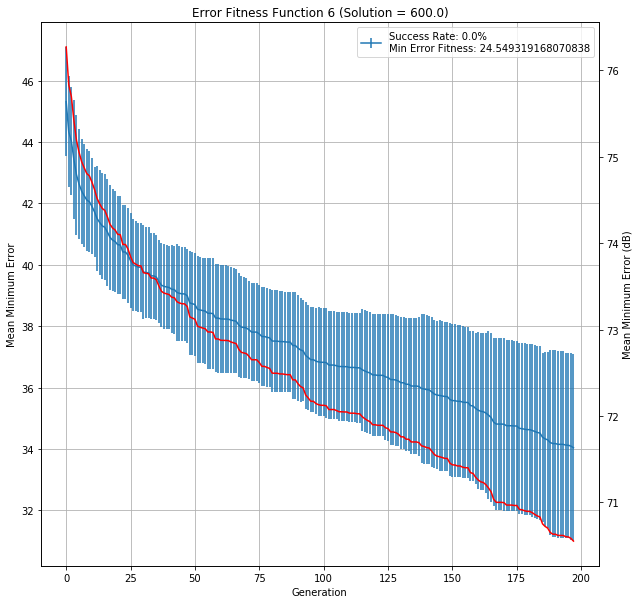

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_0.2_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,0.2,34.173435,29.464535,31.471252,36.752308,37.123546,24.549319,...,37.449,36.406118,36.03047,33.088408,33.470087,36.215307,37.102367,34.040559,5:42:04,60000
